In [124]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import numpy as np

def get_stock_data(symbol,duration):
    def mkdays(val):
        return val.days
    df = yf.Ticker(symbol).history(duration)
    df['Company'] = symbol
    df['Date'] = df.index
    df.reset_index(drop=True, inplace=True)
    vals = df.Date - df.Date[0] 
    df['Days'] = list( map( mkdays, vals ) )
    # df = df[['Date','Company','Close','Volume']]
    return df

def thinticks(df, showeach):
    val = df.Days
    lab = df.Date
    vals = []
    labs = []
    k = 0
    while k < len(val):
        vals.append( val[k] )
        labs.append( lab[k].strftime('%Y.%m.%d') )
        k = k + showeach
    return vals, labs
    
def standard_plot(df, showeach, title_string, window):
    def findwindowave(values, window):
        mx = len(values)
        windowave = []
        for k in range(0,mx):
            left = right = k
            if k > window:
                left = k - window
            if (k+window) < mx:
                right = k + window
            windowave.append( np.average( values[left:right] ) )
        return windowave
    
    x, y = df.Days, df.Close
    plt.scatter(x, y,  s=1, c='black')
    plt.scatter(x, findwindowave(y, window),  s=10, c='black')
    #plt.scatter(x, df.Low,  s=1, c='blue')
    vals, labs = thinticks(df, showeach)
    trap = plt.xticks(vals, labs, rotation=45)
    plt.ylabel('Close $')
    plt.xlabel('Date')
    plt.title(title_string)
    plt.show()
    
def findwindowave(values, window):
    mx = len(values)
    windowave = []
    for k in range(0,mx):
        left = right = k
        if k > window:
            left = k - window
        if (k+window) < mx:
            right = k + window
        windowave.append( np.average( values[left:right] ) )
    return windowave


# This creates a plot with two axis.  One in $ and the second as Fraction relative
# to the observed minimum.  
def doubleplot(df, showeach, title_string, window):
    x = df.Days
    y = df.Close
    yavg = findwindowave(y, window)
    mn = min( list(df.Close) )
    ynorm = df.Close / mn
    ynormf = findwindowave(ynorm, window)
    
    
    fig, ax1 = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(10)
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Share Price [$]', color='black')
    ax1.plot(x, y, linestyle='None', marker='.', color='blue', markersize=5)
    ax1.plot(x, yavg, linestyle='None', marker='.', color='green', markersize=10)
    ax1.tick_params(axis='y', labelcolor='black')
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    # this is an invisible series intentionally right now.  
    # the 'Fraction' axis is slightly offset from the $ axis.  
    # This will be fixed but currently the Fraction axis serves to show 
    # the percentage gain/losses compared to the minima seen on the current time 
    # window

    ax2.set_ylabel('Fraction', color='black')  # we already handled the x-label with ax1
    ax2.plot(x, ynormf, linestyle='None', marker='.', color='black', markersize=0)
    ax2.tick_params(axis='y', labelcolor='black')
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    vals, labs = thinticks(df, showeach)
    trap = plt.xticks(vals, labs)
    matplotlib.pyplot.sca(ax1)
    plt.xticks(rotation=90)
    plt.title(title_string)

    plt.show()
    

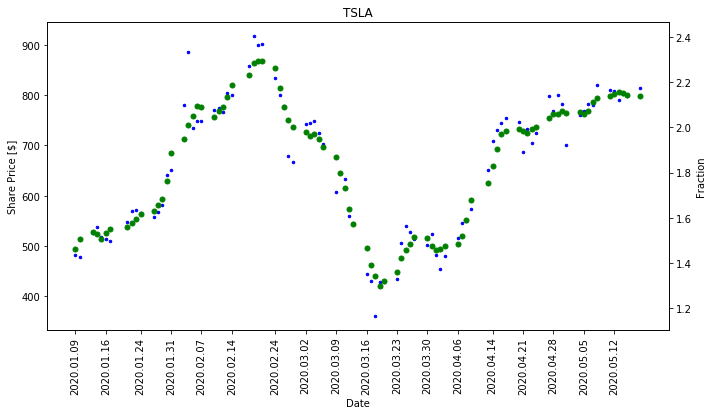

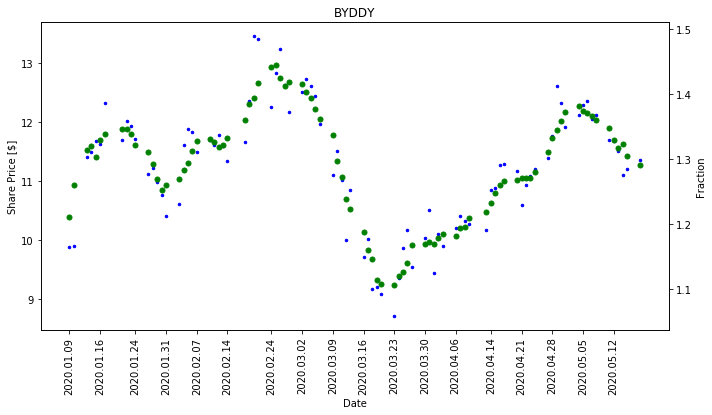

In [125]:
showeach = 5
duration = '90d'
window = 3

for symbol in ['TSLA','BYDDY']:
    df = get_stock_data(symbol,duration)
    title_string = symbol
    doubleplot(df, showeach, title_string, window)

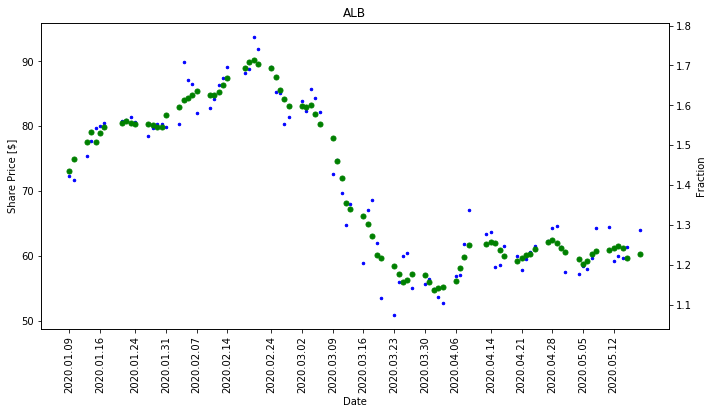

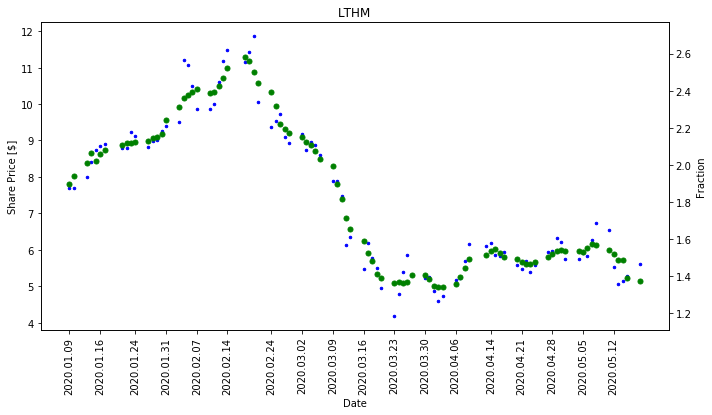

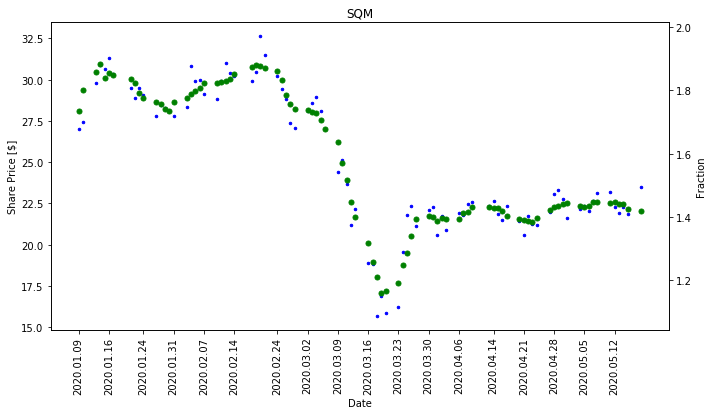

In [126]:
showeach = 5
duration = '90d'
window = 3

for symbol in ['ALB','LTHM','SQM']:
    df = get_stock_data(symbol,duration)
    title_string = symbol
    doubleplot(df, showeach, title_string, window)

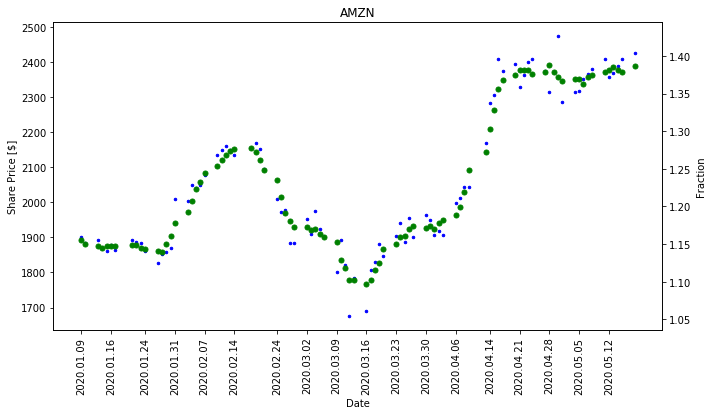

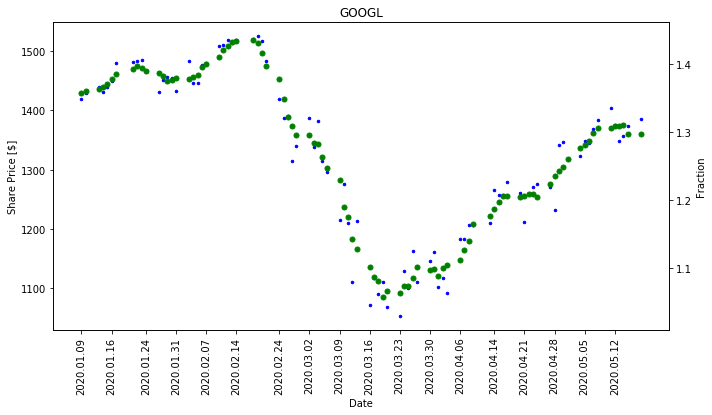

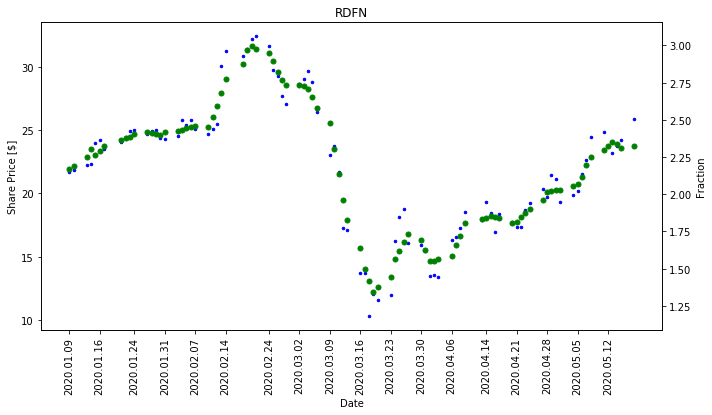

In [127]:

for symbol in ['AMZN','GOOGL','RDFN']:
    df = get_stock_data(symbol,duration)
    title_string = symbol
    doubleplot(df, showeach, title_string, window)

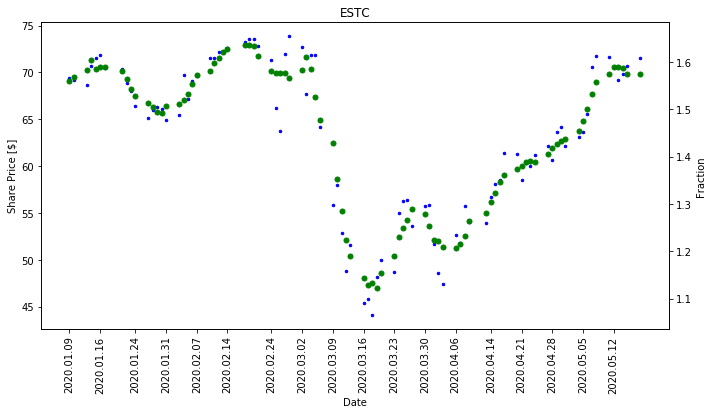

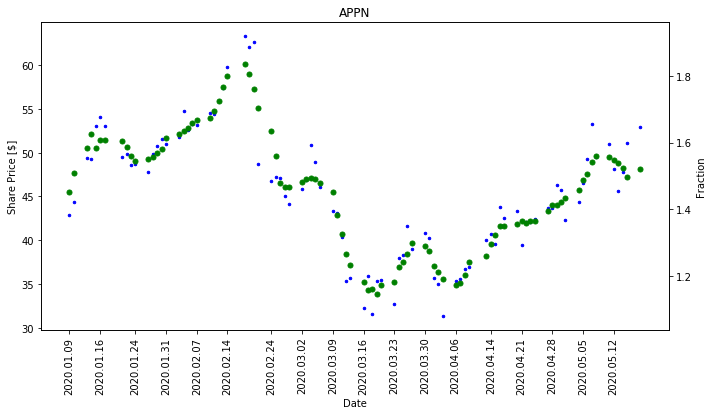

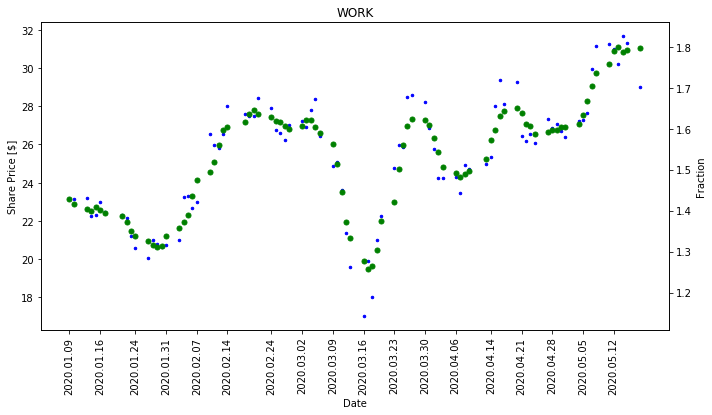

In [128]:

for symbol in ['ESTC','APPN','WORK']:
    df = get_stock_data(symbol,duration)
    title_string = symbol
    doubleplot(df, showeach, title_string, window)

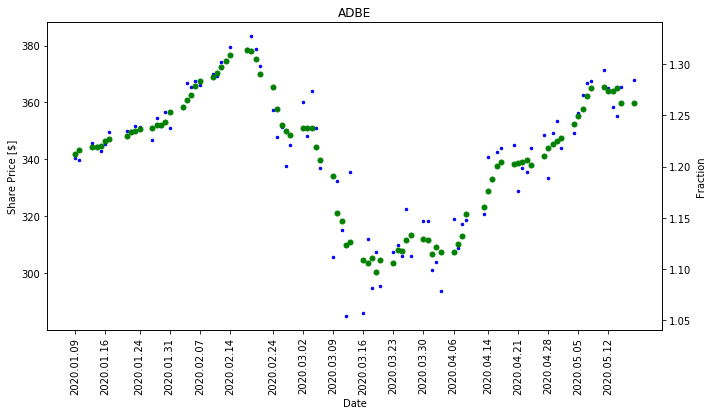

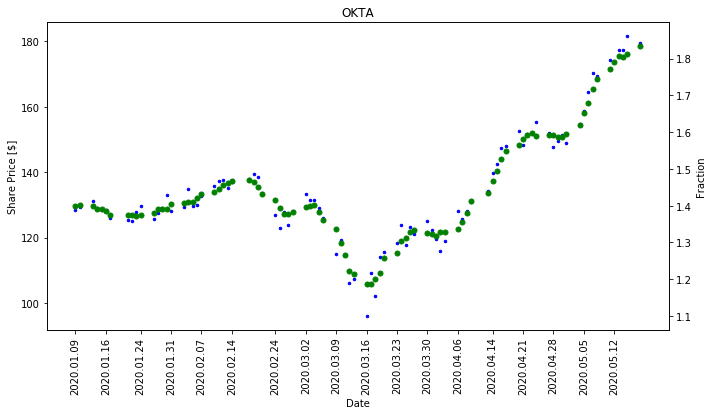

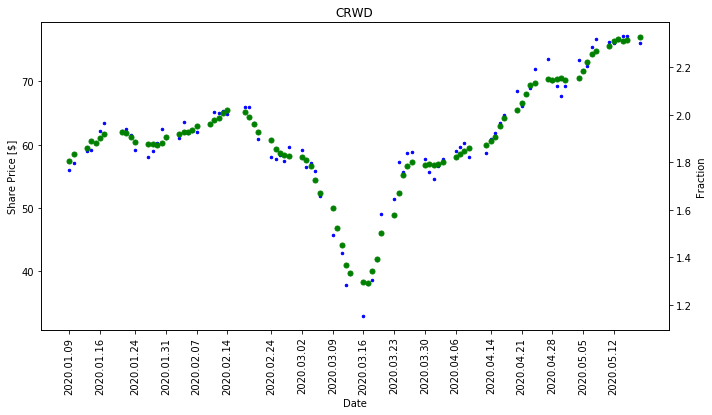

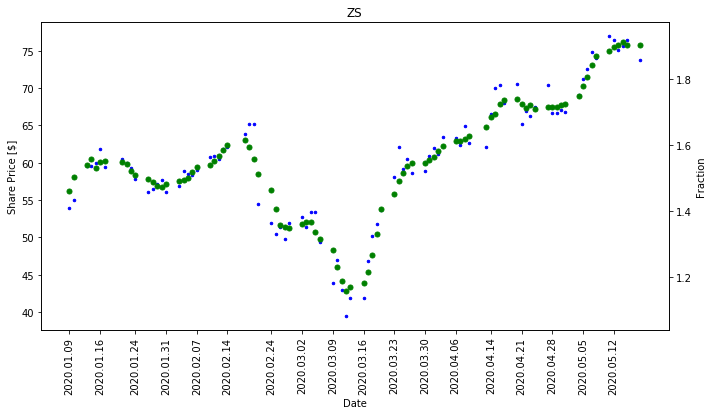

In [129]:
for symbol in ['ADBE','OKTA','CRWD','ZS']:
    df = get_stock_data(symbol,duration)
    title_string = symbol
    doubleplot(df, showeach, title_string, window)

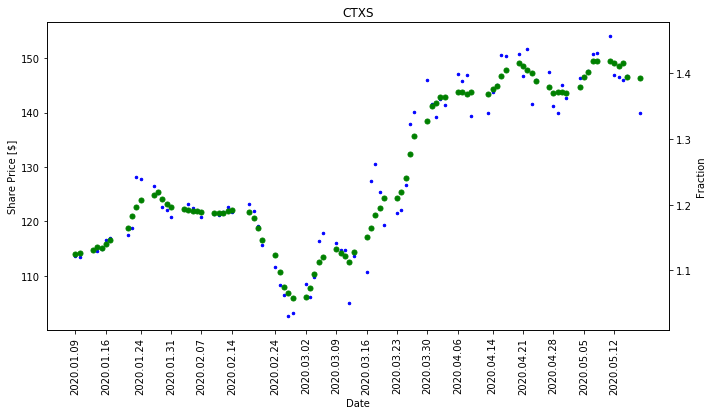

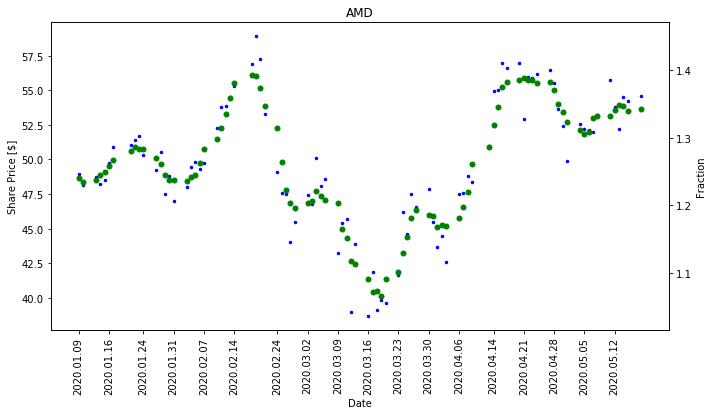

In [130]:
for symbol in ['CTXS','AMD']:
    df = get_stock_data(symbol,duration)
    title_string = symbol
    doubleplot(df, showeach, title_string, window)

In [114]:
mn = min( list(df.Close) )
ynorm = df.Close / mn

In [115]:
ynorm

0     1.134328
1     1.135476
2     1.308840
3     1.318025
4     1.339839
        ...   
85    1.339839
86    1.321470
87    1.274397
88    1.285878
89    1.303100
Name: Close, Length: 90, dtype: float64